In [ ]:
# THIS IPYNB IS RUN ON COLLAB AND DOES NOT CONTAIN THE ANSWERS THE ANSWERS ARE IN ANOTHER IPYNB FILE "omer with answes"
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/Dataset/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/Dataset/Test")

In [11]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f"Number of training images: {image_count_train}")
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f"Number of testing images: {image_count_test}")

Number of training images: 2239
Number of testing images: 118


In [12]:
batch_size = 32
img_height = 180
img_width = 180

In [13]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [15]:
class_names = train_ds.class_names
print(f"Classes: {class_names}")

Classes: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


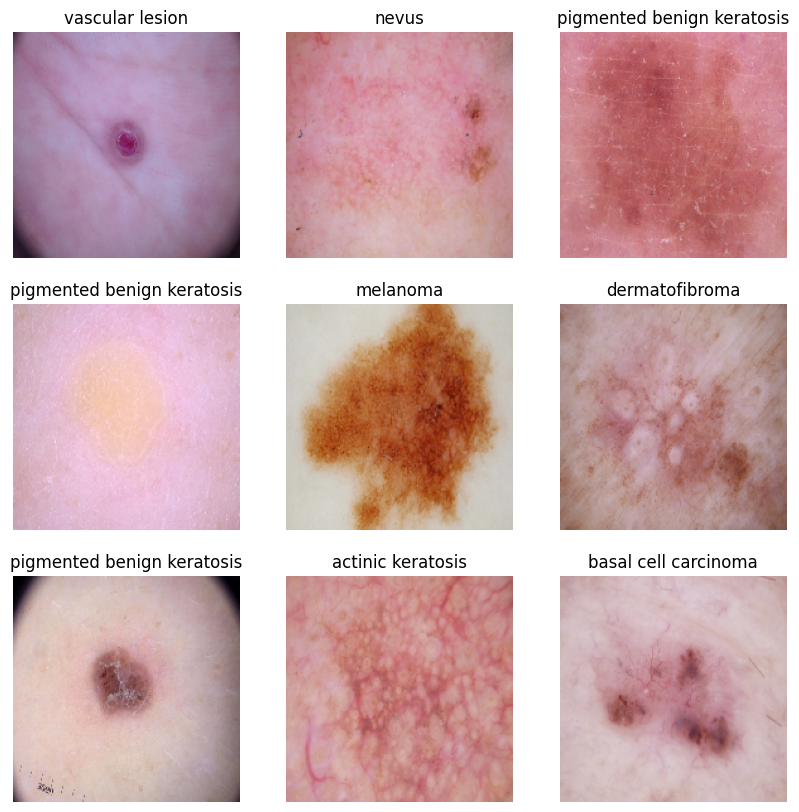

In [16]:
# Visualize one instance of each class
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [19]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Updated layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 571s 4s/step - accuracy: 0.1968 - loss: 2.3670 - val_accuracy: 0.3803 - val_loss: 1.8905
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.3381 - loss: 1.8501 - val_accuracy: 0.4787 - val_loss: 1.5908
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.4046 - loss: 1.6681 - val_accuracy: 0.4899 - val_loss: 1.4564
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.4550 - loss: 1.5316 - val_accuracy: 0.5235 - val_loss: 1.4572
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.4980 - loss: 1.4664 - val_accuracy: 0.3893 - val_loss: 1.7474
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.4654 - loss: 1.5417 - val_accuracy: 0.4966 - val_loss: 1.4381
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5292 - loss: 1.3814 - val_accuracy: 0.5123 - val_loss: 1.3780
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.5167 - loss: 1.3682 - val_accuracy: 0.5324 - v

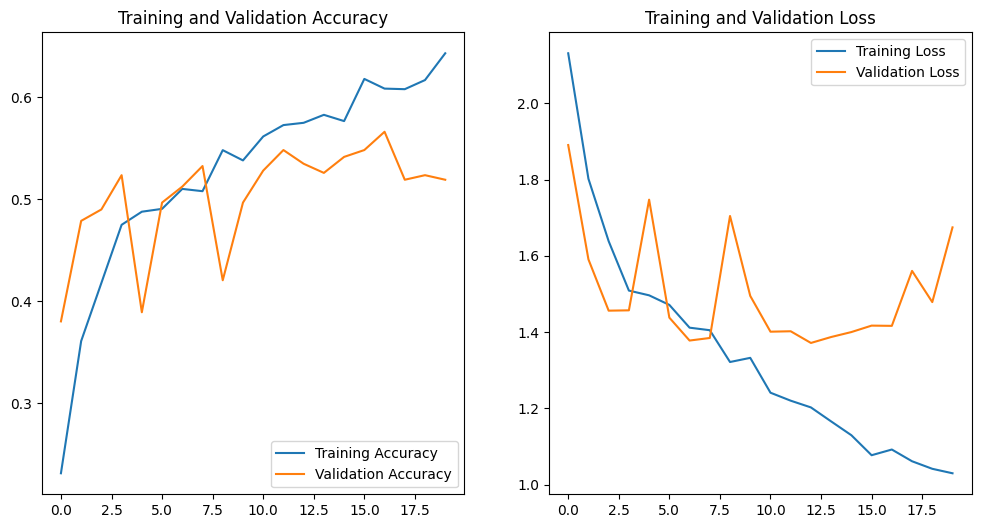

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

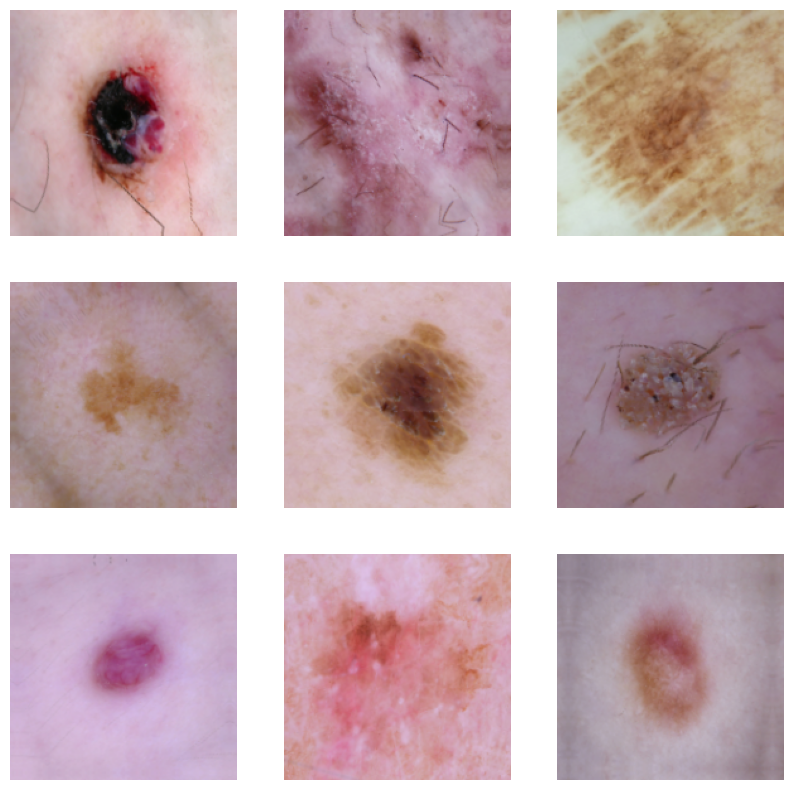

In [23]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

# Visualize augmentation
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_image = data_augmentation(images[i])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image.numpy().astype("uint8"))
        plt.axis("off")

In [24]:
# Install Augmentor
!pip install Augmentor

import Augmentor
for label in class_names:
    p = Augmentor.Pipeline(str(data_dir_train / label))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  # Add 500 samples per class

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Dataset/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78976C0C8910>: 100%|██████████| 500/500 [00:22<00:00, 21.75 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Dataset/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78976D575540>: 100%|██████████| 500/500 [00:24<00:00, 20.04 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78977028B5B0>: 100%|██████████| 500/500 [00:23<00:00, 21.16 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x78976CFE0E80>: 100%|██████████| 500/500 [02:11<00:00,  3.80 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=966x645 at 0x78976D013250>: 100%|██████████| 500/500 [01:26<00:00,  5.79 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x789779B79A50>: 100%|██████████| 500/500 [00:24<00:00, 20.60 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Dataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78976D140AC0>: 100%|██████████| 500/500 [00:51<00:00,  9.65 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Dataset/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78976D574DC0>: 100%|██████████| 500/500 [00:23<00:00, 20.92 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78976D140AC0>: 100%|██████████| 500/500 [00:26<00:00, 18.99 Samples/s]


Re Train
**bold text**

In [25]:
# Reload augmented dataset
batch_size = 32
img_height = 180
img_width = 180

train_ds_augmented = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds_augmented = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Optimize performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds_augmented = train_ds_augmented.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_augmented = val_ds_augmented.cache().prefetch(buffer_size=AUTOTUNE)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


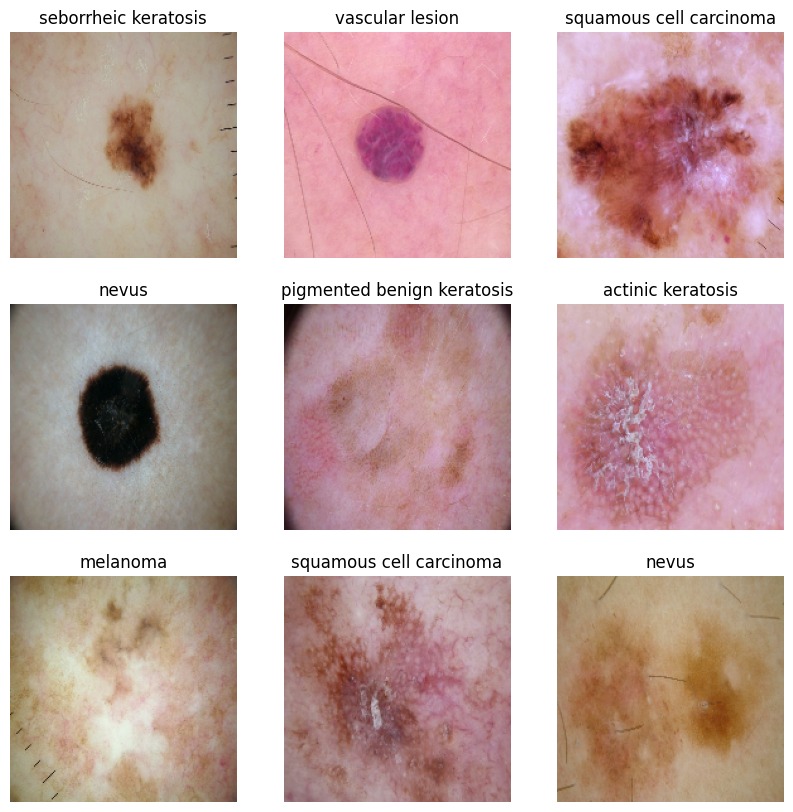

In [26]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds_augmented.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [27]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Added Dropout to reduce overfitting
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 30
history_augmented = model.fit(
    train_ds_augmented,
    validation_data=val_ds_augmented,
    epochs=epochs
)


Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.1893 - loss: 2.1804 - val_accuracy: 0.3979 - val_loss: 1.6023
Epoch 2/30
 68/169 ━━━━━━━━━━━━━━━━━━━━ 3:36 2s/step - accuracy: 0.3559 - loss: 1.6975

In [ ]:
acc = history_augmented.history['accuracy']
val_acc = history_augmented.history['val_accuracy']
loss = history_augmented.history['loss']
val_loss = history_augmented.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(
    tf.keras.preprocessing.image_dataset_from_directory(
        data_dir_test,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )
)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
